In [ ]:
#DL_LAB_ASSIGNMENT_3

In [ ]:
# 1. Loading and preprocessing the image data
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

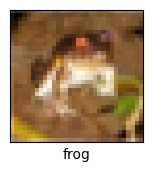

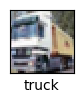

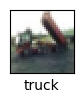

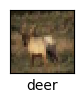

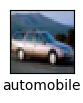

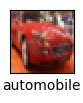

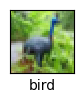

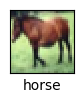

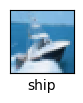

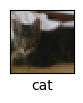

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
  plt.show()

In [ ]:
# 2. Defining the Model’s Architecture
model = models.Sequential([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(64, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(64, (3, 3), activation='relu'),
                           layers.Flatten(),
                           layers.Dense(64, activation='relu'),
                           layers.Dense(10)
                           ])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 3. Training the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 55ms/step - accuracy: 0.3626 - loss: 1.7298 - val_accuracy: 0.5538 - val_loss: 1.2477
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.5836 - loss: 1.1750 - val_accuracy: 0.6224 - val_loss: 1.0609
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 54ms/step - accuracy: 0.6425 - loss: 1.0171 - val_accuracy: 0.6515 - val_loss: 0.9855
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 55ms/step - accuracy: 0.6804 - loss: 0.9110 - val_accuracy: 0.6629 - val_loss: 0.9514
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 52ms/step - accuracy: 0.7077 - loss: 0.8281 - val_accuracy: 0.6818 - val_loss: 0.9290
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.7358 - loss: 0.7571 - val_accuracy: 0.6959 - val_loss: 0.8945
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.7557 - loss: 0.6966 - val_accuracy: 0.6952 - val_loss: 0.9229
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.7701

In [ ]:
# 4. Estimating the Model’s Performance
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 5s - 15ms/step - accuracy: 0.7039 - loss: 0.9174


In [ ]:
print(f'\nTest accuracy: {test_acc}')


Test accuracy: 0.7038999795913696
